In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np

In [3]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 10s 1us/step


In [6]:
len(X_train),len(X_test)

(60000, 10000)

In [12]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

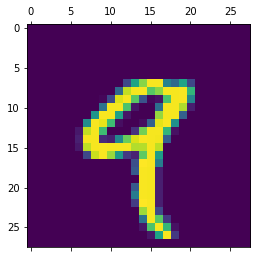

In [16]:
plt.matshow(X_train[4])

In [21]:
X_train[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [22]:
Y_train[4]

9

In [28]:
X_train=X_train/255
X_test=X_test/255           #do this to get all inpute between 0 and 1

In [29]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [31]:
X_train_flattened[4]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [32]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train_flattened,Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4723 - accuracy: 0.8751
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3034 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2832 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2733 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9252


In [34]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 3s 988us/step - loss: 0.2667 - accuracy: 0.9247


[0.2666877806186676, 0.9247000217437744]

In [35]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.1703780e-02, 3.3030724e-07, 3.4376949e-02, 9.4410932e-01,
       2.0706952e-03, 1.0219556e-01, 2.4030858e-06, 9.9984062e-01,
       9.2727423e-02, 6.8082958e-01], dtype=float32)

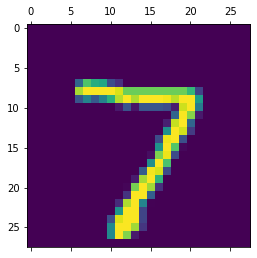

In [36]:
plt.matshow(X_test[0])

In [37]:
np.argmax(y_predicted[0])   # np.argmax finds a maximum element from an array and returns the index of it

7

In [38]:
y_predicted_label=[np.argmax(i) for i in y_predicted ]

In [39]:
y_predicted_label[:5]

[7, 2, 1, 0, 4]

In [43]:
cm=tf.math.confusion_matrix(Y_test,y_predicted_label)

In [45]:
!pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)


<AxesSubplot:>

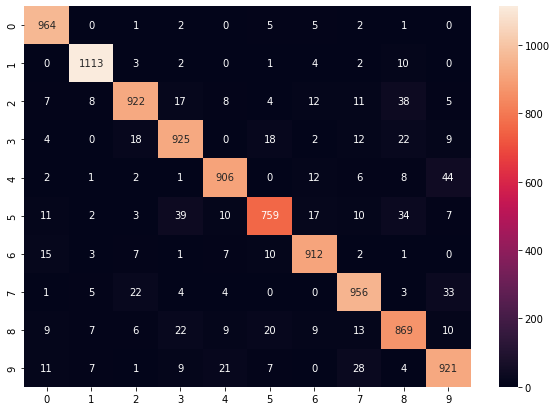

In [47]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')